In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)


c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [4]:
df_DA_US['salary_year_avg'].sample(10)

675947    115000.0
750068     65000.0
29271     105000.0
478522     77000.0
416666     67500.0
459886     55000.0
222454     93411.0
428385     92500.0
295891     95000.0
594042    125000.0
Name: salary_year_avg, dtype: float64

## compare histogram and box plot

Text(0.5, 1.0, 'salary distributions for data analyst in US')

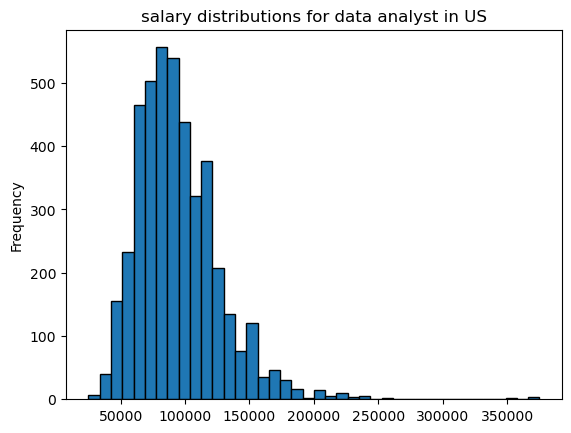

In [5]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.title('salary distributions for data analyst in US')

<Axes: >

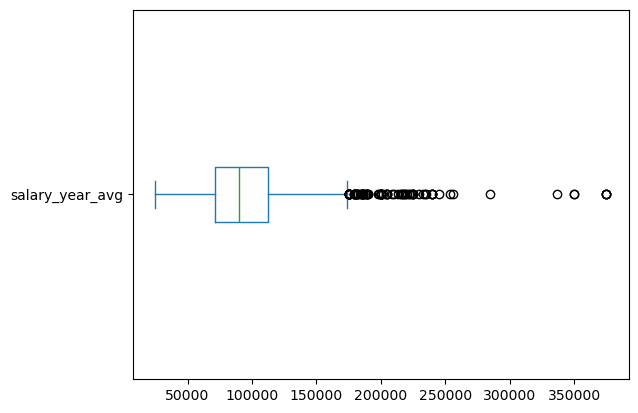

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)


##  lets break what happend inside box plot 

In [7]:

#yellow line is median
# every things in box is 50% of data called(interqurtile range)

## we want to find three jobs


In [8]:
job_titles=['Data Analyst', 'Data Scientist', 'Data Engineer']
# df_US= df[(df['job_title_short'] == job_titles) & (df['job_country']== 'United States')].copy()
# df_US  
# error: Only works if job_titlesis a single string , not a list. If it's a list, you'll get an error 

In [9]:
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])


In [ ]:
#list comprehensive 
job_list=[df_US [df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles ]
#Selects the salary_year_avg column from that filtered DataFrame.

job_list[0]  #means you are accessing the first element in the list job_list.

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [56]:
type(job_list)

list

## what this code tell us 

In [35]:
#this code collects the salary_year_avg values  for each job title in job_titles


C:\Users\HP\AppData\Local\Temp\ipykernel_10700\299610964.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,vert=False,labels= job_titles)


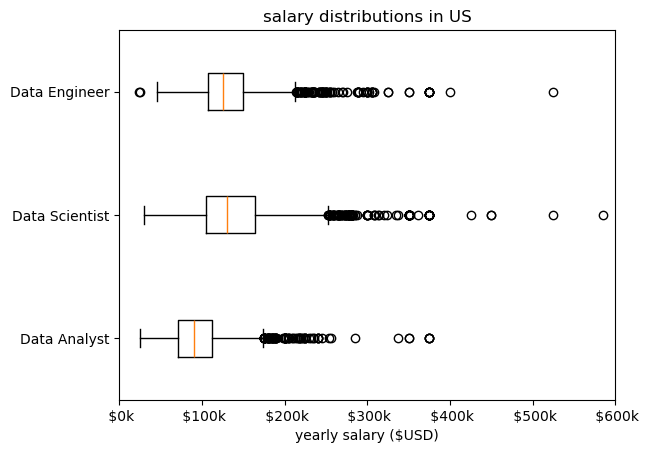

In [ ]:

plt.boxplot(job_list,vert=False,labels= job_titles)
plt.title('salary distributions in US')
plt.xlabel('yearly salary ($USD)')

ax=plt.gca()


ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show() #should allways be last thing 

In [ ]:
#LIST COMPREHENSION EXPLAINED
#------------------------------------------------------------
#[ expression for item in iterable if condition ]
# expression→ What to DO with each "item".(not optional)
#`for item` → tells Python *what to loop through*(optional)

#Explanation of plt.boxplot(job_list, labels=job_titles):
# job_list→ The data to plot.

#plt.boxplot()  take data only or df[column] (not x,y)
# if you want to filter you put condition into datafram:e.g df[df['job_title_short'] =='Data Analyst']
